# Elementary cellular automaton

## Imports

In [106]:
import numpy as np
import sys
from pydantic import BaseModel, Field, PositiveInt, computed_field, PrivateAttr, validate_call
from typing import Final, Any
from functools import cached_property
import matplotlib.pyplot as plt

In [2]:
MAX_BOARD_SIZE: Final[int] = 200

In [3]:
class Board(BaseModel):
    rows: PositiveInt = Field(..., lt=MAX_BOARD_SIZE)
    cols: PositiveInt = Field(..., lt=MAX_BOARD_SIZE)

    _board: np.ndarray = PrivateAttr()

    def model_post_init(self, __context):
        self._board = np.zeros((self.rows, self.cols), dtype=bool)

    @property
    def board(self) -> np.ndarray:
        return self._board

    @board.setter
    def board(self, value: np.ndarray):
        if value.shape != (self.rows, self.cols) or value.dtype != bool:
            msg = "board must match shape and dtype"
            raise ValueError(msg)
        self._board = value


In [ ]:
class Rules:
    """Rule is considered to be an ordered triple of booleans, representing the state for which the values is updated to True."""
    _25 = [[True, False, False], [False, True, True], [False, False, False]]
    _26 = [[True, False, False], [False, True, True], [False, False, True]]
    _30 = [[True, False, False], [False, True, True], [False, True, False], [False, False, True]]
    _73 = [, [[False, False, False]]]

In [124]:
[False, False, False] in  Rules._25
'{0:08b}'.format(73)

'01001001'

In [ ]:
x = [False, False, True, True, False, False]



In [99]:
class WolframModel:
    # @validate_call
    def __init__(self, n: int, t: int, c0: float | None = None, init_state: np.ndarray | None = None) -> None:
        if init_state is not None:
            if len(init_state.shape) > 1:
                msg = "Expected 1D array as init state."
                raise ValueError(msg)
            elif init_state.shape[0] != n:
                msg = "Init state shape does not match space shape."
                raise ValueError(msg)
        elif c0 is None:
            msg = "Neither init_state nor c0 is initiated."
            raise ValueError(msg)
        self.n = n
        self.t = t
        self.c0 = c0
        self.init_state = init_state

        self._rules = None
    
    def set_rules(self, rules: list[list[bool]]) -> None:
        self._rules = rules
    
    def run(self):
        self._pre_init_simulation()
        for i in range(self.t):
            self._update(i)
        
    def _pre_init_simulation(self) -> None:
        self.graph = self._init_graph()
    
    def _init_graph(self) -> np.ndarray[bool]:
        graph_evolution = np.zeros((self.t+1, self.n), dtype=bool)
        if self.init_state is not None:
            graph_evolution[0,:] = self.init_state
        else:
            init = np.random.choice([], size=self.n, p=[self.c0, 1 - self.c0])
            graph_evolution[0,:] = init
        return graph_evolution
    
    def _update(self, step: PositiveInt):
        """Each update corresponds with n atomic updates. From the other side we 
        store simulation in frame (t + 1 x n) that means we apply for each row 
        state after n atomic updates.
        
        Have in mind that first row is an initial state. Therefore i-th update
        row corresponds with i-th + 1 graph evolution row. 
        """
        for idx in range(self.n):
            self._apply_rules(x=step+1, y=idx)
            
    
    def _apply_rules(self, x: int, y: int) -> None:
        influencers = self.graph[x - 1, [(y + i) % self.n for i in range(-1, 2)]]
        for rule in self._rules:
            if influencers.tolist() in rule:
                self.graph[x, y] = True
                break
    
    def get_graph_evolution(self) -> np.ndarray:
        return np.vectorize(lambda x: x.value)(self.graph)


In [120]:
init_state = np.zeros(100, dtype= bool)
init_state[50] = True
model = WolframModel(100, 100, init_state = init_state)
model.set_rules([Rules._30])

In [122]:
model.run()

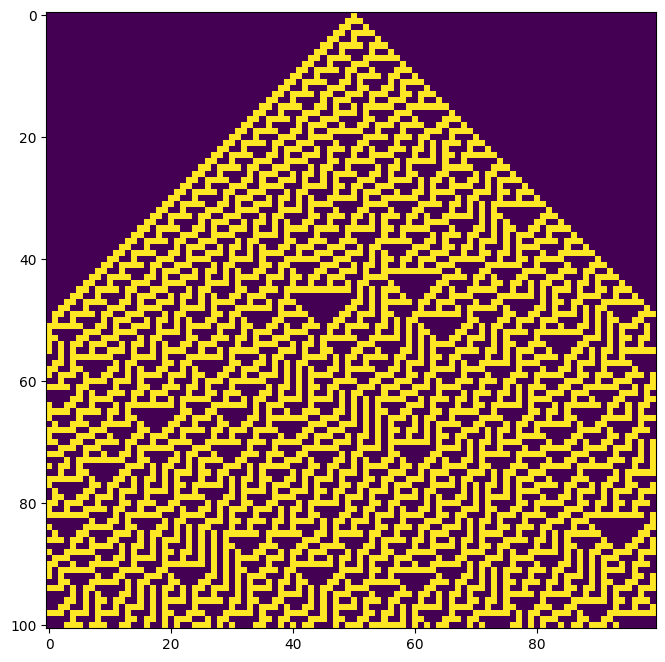

In [123]:
fig, current_ax = plt.subplots(1, 1, figsize=(8,8))
current_ax.imshow(model.graph, cmap='viridis', interpolation='nearest')

In [ ]:
from scipy.signal import convolve2d

kernel = np.array([[0,1,0]])

s = convolve2d(arr, kernel, mode='same', boundary='wrap')
new = mask[s]

In [ ]:
x=np.array([False, True, True], dtype=np.bool)
x[np.bool(True)] = False
x

array([False, False, False])

In [ ]:
class RuleEvaluator:
    def apply_rules(self, rule, board: Board):
        
    